In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from sympy.vector import CoordSys3D

from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='jshtml')
import seaborn as sns
C = CoordSys3D('')

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.8,  rc={"lines.linewidth": 5})

In [2]:
#Força:
r = 1e-2 #raio da partícula
L0 = 1.0 #tamanho da mola relaxada
k = 2. #constante elástica
m = 5. #massa
def F(t,xv):
    
    #Forças elásticas:
    #Força na partícula 1:
    dx = xv[1]-xv[0]
    F1 = k*(dx-L0)
    #Força na partícula 2:
    F2 = -F1

    #Força na partícula 3:
    dx = xv[3]-xv[2]
    F3 = k*(dx-L0)
    #Força na partícula 4:
    F4 = -F3
    
    #Força de contato (particula 2-3)
    if abs(xv[1]-xv[2]) <= 2*r:
        F2 += -1e5/abs(xv[1]-xv[2])**2
        F3 += 1e5/abs(xv[1]-xv[2])**2
#         F2 += 1e5*xv[1]
#         F3 += -1e5*xv[2]

        
        
    Ftot = np.array([F1,F2,F3,F4])
    
    return Ftot

def a(t,xv):
    return F(t,xv)/m

In [3]:
#xv[0] -> posição partícula 1
#xv[1] -> posição partícula 2
#xv[2] -> posição partícula 3
#xv[3] -> posição partícula 4
#xv[4] -> velocidade partícula 1
#xv[5] -> velocidade partícula 2
#xv[6] -> velocidade partícula 3
#xv[7] -> velocidade partícula 4
def RHS(t,xv):
    return np.hstack((xv[4:],a(t,xv)))

In [4]:
#Condição inicial:
#posição inicial:
x10 = -3.0
x20 = x10 + L0
x30 = x20 + 3.0
x40 = x30 + L0
xv0 = [x10,x20,x30,x40]
#velocidade inicial:
v1 = 0.2
v2 = -0.25
v0 = [v1,3*v1,v2,v2]

xv0 = np.array(xv0+v0)
t0, tf = 0.,50.
sol = scipy.integrate.solve_ivp(RHS,(t0,tf),xv0,rtol=1e-7,atol=1e-7,max_step=0.1)


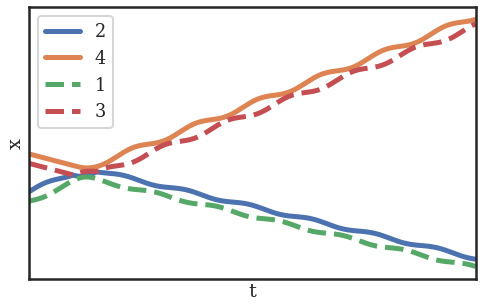

In [5]:
plt.figure(figsize=(8,5))
plt.plot(sol.t,sol.y[1,:],label='2')
plt.plot(sol.t,sol.y[3,:],label='4')
plt.plot(sol.t,sol.y[0,:],label='1',linestyle='--')
plt.plot(sol.t,sol.y[2,:],label='3',linestyle='--')
# plt.plot(sol.t,(sol.y[0,:]+sol.y[1,:]+sol.y[2,:]+sol.y[3,:])/4,label='CM',linestyle='-',alpha=0.4)
# plt.plot(sol.t,(sol.y[0,:]+sol.y[1,:])/2,label='CM1',linestyle='-',alpha=0.4)
# plt.plot(sol.t,(sol.y[2,:]+sol.y[3,:])/2,label='CM2',linestyle='-',alpha=0.4)
plt.ylabel('x')
plt.xlabel('t')
# plt.ylim(-3,3)
plt.xlim(t0,tf)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig('springCollision_CM.png')
plt.show()

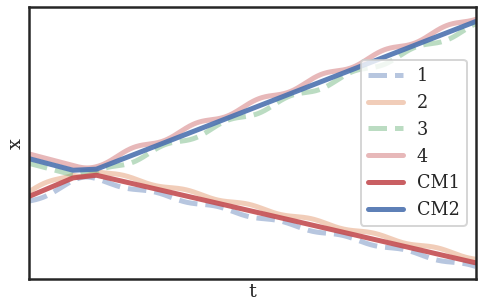

In [6]:
plt.figure(figsize=(8,5))
plt.plot(sol.t,sol.y[0,:],label='1',linestyle='--',alpha=0.4)
plt.plot(sol.t,sol.y[1,:],label='2',alpha=0.4)
plt.plot(sol.t,sol.y[2,:],label='3',linestyle='--',alpha=0.4)
plt.plot(sol.t,sol.y[3,:],label='4',alpha=0.4)



plt.plot(sol.t,(sol.y[0,:]+sol.y[1,:])/2,label='CM1',linestyle='-',alpha=0.9,c='r')
plt.plot(sol.t,(sol.y[2,:]+sol.y[3,:])/2,label='CM2',linestyle='-',alpha=0.9,c='b')
plt.ylabel('x')
plt.xlabel('t')
# plt.ylim(-3,3)
plt.xlim(t0,tf)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig('springCollision_CMb.png')
plt.show()

In [7]:
x1F = scipy.interpolate.interp1d(sol.t,sol.y[0,:])
x2F = scipy.interpolate.interp1d(sol.t,sol.y[1,:])
x3F = scipy.interpolate.interp1d(sol.t,sol.y[2,:])
x4F = scipy.interpolate.interp1d(sol.t,sol.y[3,:])

In [12]:
tmin, tmax = t0,tf
dt = 0.1

fig = plt.figure(figsize=(8,3))
ptc1, = plt.plot([x1F(tmin),0.],'o',markersize=15)
ptc2, = plt.plot([x2F(tmin),0.],'o',markersize=15)
ptc3, = plt.plot([x3F(tmin),0.],'o',markersize=15)
ptc4, = plt.plot([x4F(tmin),0.],'o',markersize=15)


line1, = plt.plot([x1F(tmin),x2F(tmin)],[0.,0.],linestyle='--',c='gray',alpha=0.5)
line2, = plt.plot([x3F(tmin),x4F(tmin)],[0.,0.],linestyle='--',c='gray',alpha=0.5)

d = x3F(tmin)-x2F(tmin)

title = plt.title(r'$t=%2.3f$' %(tmin),fontsize=20)

plt.xlabel('x (m)')
plt.xlim(-15,15)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

def init():
    tpts = [tmin]
    ptc1.set_data([x1F(tmin)],[0.])
    ptc2.set_data([x2F(tmin)],[0.])
    ptc3.set_data([x3F(tmin)],[0.])
    ptc4.set_data([x4F(tmin)],[0.])
    
   
    
    line1.set_data([x1F(tmin),x2F(tmin)],[0.,0.])
    line2.set_data([x3F(tmin),x4F(tmin)],[0.,0.])
    line1._linewidth = 1.0
    line2._linewidth = 1.0    
    
    return (ptc1,ptc2,ptc3,ptc4,line1,line2)

def animate(i):
    
    tA = tmin+i*dt
    
    ptc1.set_data([x1F(tA)],[0.])
    ptc2.set_data([x2F(tA)],[0.])
    ptc3.set_data([x3F(tA)],[0.])
    ptc4.set_data([x4F(tA)],[0.])
    
    
    
    line1.set_data([x1F(tA),x2F(tA)],[0.,0.])
    line2.set_data([x3F(tA),x4F(tA)],[0.,0.])
    
    dx1 = abs(x2F(tA)-x1F(tA))-L0
    dx2 = abs(x2F(tA)-x1F(tA))-L0
        
    line1._linewidth = 0.8/(0.1+abs(dx1)/2.)
    line2._linewidth = 0.8/(0.1+abs(dx2)/2.)
    
    d = x3F(tA)-x2F(tA)
    
    
    title.set_text(r'$t=%2.3f$' %(tA))
    
    return (ptc1,ptc2,ptc3,ptc4,line1,line2)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=30, 
                               blit=True)
plt.close()
anim.save('springCollision0.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
anim
# plt.show()

In [13]:
tmin, tmax = t0,tf
dt = 0.1

fig = plt.figure(figsize=(8,3))
ptc1, = plt.plot([x1F(tmin),0.],'o',markersize=15)
ptc2, = plt.plot([x2F(tmin),0.],'o',markersize=15)
ptc3, = plt.plot([x3F(tmin),0.],'o',markersize=15)
ptc4, = plt.plot([x4F(tmin),0.],'o',markersize=15)

ptCM1, = plt.plot([(x1F(tmin)+x2F(tmin))/2,1.0],'P',markersize=15,alpha=0.3)
ptCM2, = plt.plot([(x3F(tmin)+x4F(tmin))/2,1.0],'P',markersize=15,alpha=0.3)

line1, = plt.plot([x1F(tmin),x2F(tmin)],[0.,0.],linestyle='--',c='gray',alpha=0.5)
line2, = plt.plot([x3F(tmin),x4F(tmin)],[0.,0.],linestyle='--',c='gray',alpha=0.5)

d = x3F(tmin)-x2F(tmin)

title = plt.title(r'$t=%2.3f$' %(tmin),fontsize=20)

plt.xlabel('x (m)')
plt.xlim(-15,15)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

def init():
    tpts = [tmin]
    ptc1.set_data([x1F(tmin)],[0.])
    ptc2.set_data([x2F(tmin)],[0.])
    ptc3.set_data([x3F(tmin)],[0.])
    ptc4.set_data([x4F(tmin)],[0.])
    
    ptCM1.set_data([(x1F(tmin)+x2F(tmin))/2,1.0])
    ptCM2.set_data([(x3F(tmin)+x4F(tmin))/2,1.0])
    
    
    line1.set_data([x1F(tmin),x2F(tmin)],[0.,0.])
    line2.set_data([x3F(tmin),x4F(tmin)],[0.,0.])
    line1._linewidth = 1.0
    line2._linewidth = 1.0    
    
    return (ptc1,ptc2,ptc3,ptc4,line1,line2)

def animate(i):
    
    tA = tmin+i*dt
    
    ptc1.set_data([x1F(tA)],[0.])
    ptc2.set_data([x2F(tA)],[0.])
    ptc3.set_data([x3F(tA)],[0.])
    ptc4.set_data([x4F(tA)],[0.])
    
    ptCM1.set_data([(x1F(tA)+x2F(tA))/2,1.0])
    ptCM2.set_data([(x3F(tA)+x4F(tA))/2,1.0])
    
    
    line1.set_data([x1F(tA),x2F(tA)],[0.,0.])
    line2.set_data([x3F(tA),x4F(tA)],[0.,0.])
    
    dx1 = abs(x2F(tA)-x1F(tA))-L0
    dx2 = abs(x2F(tA)-x1F(tA))-L0
        
    line1._linewidth = 0.8/(0.1+abs(dx1)/2.)
    line2._linewidth = 0.8/(0.1+abs(dx2)/2.)
    
    d = x3F(tA)-x2F(tA)
    
    
    title.set_text(r'$t=%2.3f$' %(tA))
    
    return (ptc1,ptc2,ptc3,ptc4,line1,line2)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=30, 
                               blit=True)
plt.close()
anim.save('springCollision.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
anim
# plt.show()